In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import gc
import nltk
nltk.download('stopwords')
import math

from smart_open import open
from nltk.corpus import stopwords
import sklearn
from sklearn.metrics import classification_report
from keras.layers import Dropout
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras import layers


from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Text
class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [4]:
#LSTM FOR TEXT
# first input model
class Text:
  input3 = Input(shape = (250,5100))
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(dense5)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(dense6)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=input3, outputs=output)
  # summarize layers
  print(model.summary())
  # # plot graph
  print(plot_model(model, to_file='multiple_inputs.png'))
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')
    return self.model


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 5100)]       0         
                                                                 
 dense (Dense)               (None, 250, 1000)         5101000   
                                                                 
 dense_1 (Dense)             (None, 250, 500)          500500    
                                                                 
 dense_2 (Dense)             (None, 250, 250)          125250    
                                                                 
 lstm (LSTM)                 (None, 128)               194048    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,920,927
Trainable params: 5,920,927
Non-train

In [5]:
#Audio

class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")

In [6]:
#LSTM FOR AUDIO
# first input model

class Audio:
  input3 = Input(shape = (250,74))
  # dense4 = Dense(1000)(input3)
  # dense5 = Dense(500)(dense4)
  # dense6 = Dense(250)(dense5)
  # interpretation model
  lstm = LSTM(60, dropout = 0.2, recurrent_dropout = 0.2)(input3)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=input3, outputs=output)
  # summarize layers
  print(model.summary())
  # plot graph
  print(plot_model(model, to_file='multiple_inputs.png'))
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')
    return self.model


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 74)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                32400     
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 32,461
Trainable params: 32,461
Non-trainable params: 0
_________________________________________________________________
None
<IPython.core.display.Image object>


In [7]:
#Video

class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [8]:
#LSTM FOR VIDEO
# first input model
class Video:
  input3 = Input(shape = (250,388))
  # dense4 = Dense(1000)(input3)
  # dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(input3)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(dense6)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=input3, outputs=output)
  # summarize layers
  print(model.summary())
  # plot graph
  print(plot_model(model, to_file='multiple_inputs.png'))
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')
    return self.model



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 388)]        0         
                                                                 
 dense_5 (Dense)             (None, 250, 250)          97250     
                                                                 
 lstm_2 (LSTM)               (None, 128)               194048    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 291,427
Trainable params: 291,427
Non-trainable params: 0
_________________________________________________________________
None
<IPython.core.display.Image object>


In [9]:
#Text + Audio
class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [10]:
class Text_Audio:
# first input model
  input1 = Input(shape=(250,74), name = 'Audio_input')
  # highway6 = Highway()(highway5)
  dense1 = Dense(74)(input1)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(dense5)
  dense3 = Dense(74)(dense6)
  # merge input models
  merge = concatenate([dense1,dense3], axis = 1)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input1, input3], outputs=output)
  # summarize layers
  print(model.summary())
  # # plot graph
  plot_model(model)
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)

  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')
    return self.model

# inp = np.array([audio_train,video_train,text_train], dtype = object)





Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_input (InputLayer)        [(None, 250, 5100)]  0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 250, 1000)    5101000     ['Text_input[0][0]']             
                                                                                                  
 dense_9 (Dense)                (None, 250, 500)     500500      ['dense_8[0][0]']                
                                                                                                  
 Audio_input (InputLayer)       [(None, 250, 74)]    0           []                               
                                                                                            

In [11]:
#Text+Video


class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [12]:
class Text_Video:
  input2 = Input(shape=(250,388), name = 'Video_input')
  # highway2 = Highway()(input2)
  # highway3 = Highway()(highway2)
  # highway4 = Highway()(highway3)
  # dense7 = Dense(200)(highway4)
  dense2 = Dense(250)(input2)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  # dense6 = Dense(250)(dense5)
  dense3 = Dense(250)(dense5)
  # merge input models
  merge = concatenate([dense2,dense3], axis = 1)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input2, input3], outputs=output)
  # summarize layers
  print(model.summary())
  # plot graph
  plot_model(model)
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)

  def run_model(self):
    self.model.compile(optimizer= self.optimizer, loss='binary_crossentropy')
    return self.model

# inp = np.array([audio_train,video_train,text_train], dtype = object)




Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_input (InputLayer)        [(None, 250, 5100)]  0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 250, 1000)    5101000     ['Text_input[0][0]']             
                                                                                                  
 Video_input (InputLayer)       [(None, 250, 388)]   0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 250, 500)     500500      ['dense_14[0][0]']               
                                                                                            

In [13]:
#Text+Audio+Video

class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [14]:
class Text_Audio_Video:
# first input model
  input1 = Input(shape=(250,74), name = 'Audio_input')
  # highway1 = Highway()(input1)
  # highway5 = Highway()(highway1)
  # highway6 = Highway()(highway5)
  dense1 = Dense(74)(input1)

  # second input model
  input2 = Input(shape=(250,388), name = 'Video_input')
  # highway2 = Highway()(input2)
  # highway3 = Highway()(highway2)
  # highway4 = Highway()(highway3)
  dense7 = Dense(200)(input2)
  dense2 = Dense(74)(dense7)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(dense5)
  dense3 = Dense(74)(dense6)
  # merge input models
  merge = concatenate([dense1,dense2,dense3], axis = 1)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input1, input2, input3], outputs=output)
  # # summarize layers
  print(model.summary())
  # # plot graph
  # plot_model(model)
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)

  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')
    return self.model

# inp = np.array([audio_train,video_train,text_train], dtype = object)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_input (InputLayer)        [(None, 250, 5100)]  0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 250, 1000)    5101000     ['Text_input[0][0]']             
                                                                                                  
 Video_input (InputLayer)       [(None, 250, 388)]   0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 250, 500)     500500      ['dense_21[0][0]']               
                                                                                            

In [15]:
#MAKE DATASET


dev_location = "dev_data"
test_location = "test_data"
train_location = "train_data"

devData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
testData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/full_test_split.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
trainData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]


dataset = np.concatenate((devData, np.concatenate((testData, trainData))))

gc.collect()

5504

In [16]:
max_num_words = 17
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)
stop_words = set(stopwords.words('english'))


In [17]:
def checkDataPointExistence(patientID, split):
  for i in split:
    if(patientID == i[0]):
      return True
  return False


In [18]:
def getData(patientID, location):
  # print("PatientID: " + str(int(patientID)))
  retData = [int(patientID)]
  textD = getTextData(patientID, location)
  audioD = getAudioData(patientID, location, textD)
  videoD = getVideoData(str(int(patientID)), location, textD)
  # patientD = np.concatenate((textD, audioD, videoD), axis = 1)
  # print("Final Patient Data: " + str(patientD.shape))
  return textD,audioD,videoD


In [19]:
def getTextData(patientID, location):
  fileName = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/" + str(int(patientID)) + "_TRANSCRIPT.csv"
  file = np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8', engine='python'))

  # Remove All Utterences By Ellie:
  for i in range(len(file)):
    if(file[i][2] != 'Participant'):
      np.delete(file, i)
      i-=1

  # Remove Speaker Columnn
  file = np.delete(file, 2, 1)

  # Convert Text Into Word Vectors:
  w2vs = np.zeros((1, max_num_words*300))
  for i in range(len(file)):
    sentence = file[i][2]
    w2v = returnWordToVec(sentence)
    w2vs = np.concatenate((w2vs, w2v), axis = 0)
  w2vs = np.delete(w2vs, 0, 0)

  # Delete Sentences and Replace With W2Vs
  file = np.delete(file, 2, 1)
  file = np.concatenate((file, w2vs), axis = 1)
  return file

In [20]:
def remove_StopWords(sentence):
    filtered_sentence = []
    for w in sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [21]:
def returnWordToVec(sentence):
  global max_num_words, stop_words, model
  sentence = str(sentence).split(" ")
  sentence = remove_StopWords(sentence)
  index_word = 0
  wordMatrix = np.zeros(max_num_words*300)
  for j in range(min(max_num_words, len(sentence))):
    try:
      word = sentence[j]
      if(word[0] == '<'):
        if(word.find('>')!=-1):
          word = word[1:-1]
        else:
          word = word[1:]
      else:
        if(word.find('>')!=-1):
          word = word[0:-1]
      ss = np.array(model[word])
      wordMatrix[index_word*300:(index_word+1)*300] = ss
      index_word+=1
    except Exception as e:
      continue
  wordMatrix = np.array(wordMatrix.reshape(1,-1))
  return wordMatrix

In [22]:
def audioDataHelper(X):
    for i in range(X.shape[0]):
        if(X[i,1] == 0):
            X[i,0] = 0
            for j in range(7):
                X[i,j+1] = 0
    X = np.array(X)
    return X

In [23]:
def getAudioData(patientID, location, textD):
  fileName = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/" + str(int(patientID)) + "_COVAREP.csv"
  data = pd.read_csv(fileName,header = None)
  data = data.iloc[:,:].values
  data = audioDataHelper(data)
  # print("Audio Raw Data:" + str(data.shape))
  sentenceDatas = []
  for sentence in textD:
    sentenceStartime = sentence[0]
    sentenceEndTime = sentence[1]
    startIndex = math.floor(sentenceStartime/0.01)
    endIndex = math.ceil(sentenceEndTime/0.01)
    # print("Start Time: " + str(startIndex))
    # print("End Time: " + str(endIndex))
    sentenceData = data[startIndex: endIndex]
    sentenceData = np.average(sentenceData, axis = 0)
    # This might be a possible error
    sentenceData = np.array(sentenceData.reshape(1, -1))
    sentenceDatas.append(sentenceData)

  sentenceDatas = np.array(sentenceDatas)
  sentenceDatas = np.reshape(sentenceDatas, (textD.shape[0],-1))
  # print("Audio Final Data:" + str(sentenceDatas.shape))

  return sentenceDatas

In [24]:
def getVideoDataHelper(patientID, location):
  root = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/"
  file1 = root + (patientID)+"_CLNF_AUs.txt"
  file2 = root + (patientID)+"_CLNF_features.txt"
  file3 = root + (patientID)+"_CLNF_features3D.txt"
  file4 = root + (patientID)+"_CLNF_gaze.txt"
  file5 = root + (patientID)+"_CLNF_hog.txt"
  file6 = root + (patientID)+"_CLNF_pose.txt"
  data = processVideoData(file1)
  data = np.concatenate((data, processVideoData(file2)), 1)
  data = np.concatenate((data, processVideoData(file3)), 1)
  data = np.concatenate((data, processVideoData(file4)), 1)
  data = np.concatenate((data, processVideoData(file6)), 1)
  # print("Video Raw Data:" + str(data.shape))
  return data

In [25]:
def processVideoData(filename):
  try:
    data = pd.read_csv(filename,delimiter=',', dtype=float)
    X = data.iloc[:,:].values
    X = np.delete(X, 0, 1)
    X = np.delete(X, 1, 1)
  except:
    # print("Video Data corrupt, fixing.")
    data = pd.read_csv(filename,delimiter=',')
    X = data.iloc[:,:].values
    X = np.delete(X, 0, 1)
    X = np.delete(X, 1, 1)
    for i in range(len(X)):
        if(isinstance(X[i][5],str) or isinstance(X[i][7],str)):
            X[i] = np.zeros((1, X.shape[1]))
            # print("se" , end = " ")
  return X

In [26]:
def getVideoData(patientID, location, textD):
  data = getVideoDataHelper(patientID, location)
  sentenceDatas = []
  for sentence in textD:
    sentenceStartime = sentence[0]
    sentenceEndTime = sentence[1]
    startIndex = math.floor(sentenceStartime/0.333)
    endIndex = math.ceil(sentenceEndTime/0.333)
    # print("Start Time: " + str(startIndex))
    sentenceData = data[startIndex: endIndex]
    sentenceData = np.average(sentenceData, axis = 0)
    # This might be a possible error
    sentenceData = np.array(sentenceData.reshape(1, -1))
    sentenceDatas.append(sentenceData)

  sentenceDatas = np.array(sentenceDatas)
  sentenceDatas = np.reshape(sentenceDatas, (textD.shape[0],-1))
  # print("Video Final Data:" + str(sentenceDatas.shape))
  return sentenceDatas


In [27]:
# Xtrain = []
Ytrain = []
# Xtest = []
Ytest = []


audio_train = []
video_train = []
text_train = []

audio_test = []
video_test = []
text_test = []


In [28]:
for datapoint in dataset:
  # print(datapoint[0])
  if(checkDataPointExistence(datapoint[0], devData)):

    # Data Point in Dev Set
    text,audio,video = getData(datapoint[0], dev_location)
    audio_train.append(audio)
    video_train.append(video)
    text_train.append(text)
    # Xtest.append(data)
    Ytrain.append(datapoint[1])
    # print(data)
  elif(checkDataPointExistence(datapoint[0], testData)):
    # Data Point in Test Set
    text,audio,video = getData(datapoint[0], test_location)
    audio_test.append(audio)
    video_test.append(video)
    text_test.append(text)
    # Xtest.append(data)
    Ytest.append(datapoint[1])
  elif(checkDataPointExistence(datapoint[0], trainData)):
    # Data Point in Train Set
    text,audio,video = getData(datapoint[0], train_location)
    audio_train.append(audio)
    video_train.append(video)
    text_train.append(text)
    # Xtest.append(data)
    Ytrain.append(datapoint[1])

<ipython-input-25-4ddb554e8581>:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename,delimiter=',')
<ipython-input-25-4ddb554e8581>:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,

In [29]:
def refactor(arr, size):
  arrsize = arr.shape[0]
  temp = np.zeros((size, arr.shape[1]))
  for i in range(min(len(arr), size)):
    temp[i] = arr[i]
  return temp

In [30]:
numberOfSentences = 250

devData = []
trainData = []
testData = []
gc.collect()

190

In [31]:
for i in range(len(audio_train)):
  audio_train[i] = refactor(audio_train[i], numberOfSentences)
  video_train[i] = refactor(video_train[i], numberOfSentences)
  text_train[i] = refactor(text_train[i], numberOfSentences)
  # print(Xtrain[i].shape)

In [32]:
# for i in range(len(audio_dev)):
#   audio_dev[i] = refactor(audio_dev[i], numberOfSentences)
#   video_dev[i] = refactor(video_dev[i], numberOfSentences)
#   text_dev[i] = refactor(text_dev[i], numberOfSentences)
#   # print(Xtrain[i].shape)

In [33]:
for i in range(len(audio_test)):
  audio_test[i] = refactor(audio_train[i], numberOfSentences)
  video_test[i] = refactor(video_train[i], numberOfSentences)
  text_test[i] = refactor(text_train[i], numberOfSentences)
  # print(Xtest[i].shape)

In [34]:
audio_test = np.array(audio_test)
video_test = np.array(video_test)
text_test = np.array(text_test)
text_test = text_test[:,:,2:]

audio_train = np.array(audio_train)
video_train = np.array(video_train)
text_train = np.array(text_train)
text_train = text_train[:,:,2:]

# audio_dev = np.array(audio_dev)
# video_dev = np.array(video_dev)
# text_dev = np.array(text_dev)
# text_dev = text_dev[:,:,2:]

dataset = []
gc.collect()

print(audio_test.shape,video_test.shape,text_test.shape)
print(audio_train.shape,video_train.shape,text_train.shape)
# print(audio_dev.shape,video_dev.shape,text_dev.shape)


(47, 250, 74) (47, 250, 388) (47, 250, 5100)
(142, 250, 74) (142, 250, 388) (142, 250, 5100)


In [35]:
Ytrain = np.array(Ytrain)
Ytest = np.array(Ytest)



In [36]:
import sklearn
from sklearn import preprocessing


def upsample(X_train,Y_train):
  X_train_0 = X_train[Y_train==0]
  X_train_1 = X_train[Y_train==1]

  Y_train_1 = Y_train[Y_train==1]
  # print(Y_train_1.shape)
  # print(X_train_1.shape)
  size = X_train_0.shape[0] - X_train_1.shape[0]
  X = []
  Y = []
  X_train = list(X_train)
  Y_train = list(Y_train)
  while(size>0):
    size -= 1
    index = np.random.randint(0,X_train_1.shape[0]-1)
    leave_index = np.random.randint(0,len(X_train)-1)
    X_add = X_train_1[index]
    X_leave = X_train[leave_index]

    Y_add = Y_train_1[index]
    Y_leave = Y_train[leave_index]

    X_train[leave_index] = X_add
    X_train.append(X_leave)

    Y_train[leave_index] = Y_add
    Y_train.append(Y_leave)


  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  return X_train,Y_train

In [37]:
audio_train = np.nan_to_num(audio_train)
video_train = np.nan_to_num(video_train)
text_train = np.nan_to_num(text_train)

audio_train, _ = upsample(audio_train,Ytrain)
video_train, _ = upsample(video_train,Ytrain)
text_train, Ytrain = upsample(text_train,Ytrain)

print(audio_train.shape)
print(video_train.shape)
print(text_train.shape)
print(Ytrain.shape)

(200, 250, 74)
(200, 250, 388)
(200, 250, 5100)
(200,)


In [38]:
for i in range(audio_train.shape[0]):
  audio_train[i] = sklearn.preprocessing.normalize(audio_train[i])
  video_train[i] = sklearn.preprocessing.normalize(video_train[i])
  text_train[i] = sklearn.preprocessing.normalize(text_train[i])


In [39]:

print(Ytest.shape)


(47,)


In [40]:
audio_test = np.nan_to_num(audio_test)
video_test = np.nan_to_num(video_test)
text_test = np.nan_to_num(text_test)


for i in range(audio_test.shape[0]):
  audio_test[i] = sklearn.preprocessing.normalize(audio_test[i])
  video_test[i] = sklearn.preprocessing.normalize(video_test[i])
  text_test[i] = sklearn.preprocessing.normalize(text_test[i])


In [41]:
def Thresholding(Y_pred, threshold):
  Y_pred2 = []
  print("Y_pred: ", Y_pred.shape)
  for i in range(len(Y_pred)):
    if(Y_pred[i] < threshold):
      Y_pred2.append(0)
    else:
      Y_pred2.append(1)

  return np.array(Y_pred2)

In [42]:
print("-------------------------------------- TEXT (W/o GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Text()
model = model1.run_model()

model.fit(text_train,Ytrain, epochs=25,validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='min',
    baseline=None, restore_best_weights=True), batch_size = 137)



-------------------------------------- TEXT (W/o GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 8s 1s/step - loss: 0.6936 - val_loss: 0.6918
Epoch 2/25
2/2 [==============================] - 2s 657ms/step - loss: 0.6900 - val_loss: 0.6841
Epoch 3/25
2/2 [==============================] - 2s 654ms/step - loss: 0.6871 - val_loss: 0.6802
Epoch 4/25
2/2 [==============================] - 2s 691ms/step - loss: 0.6849 - val_loss: 0.6775
Epoch 5/25
2/2 [==============================] - 2s 686ms/step - loss: 0.6817 - val_loss: 0.6737
Epoch 6/25
2/2 [==============================] - 2s 686ms/step - loss: 0.6779 - val_loss: 0.6692
Epoch 7/25
2/2 [==============================] - 2s 674ms/step - loss: 0.6744 - val_loss: 0.6664
Epoch 8/25
2/2 [==============================] - 2s 676ms/step - loss: 0.6701 - val_loss: 0.6635
Epoch 9/25
2/2 [==============================] - 2s 666ms/step - loss: 0.6642 - val_loss: 0.6587


2/2 [==============================] - 1s 81ms/step
Y_pred:  (47, 1)


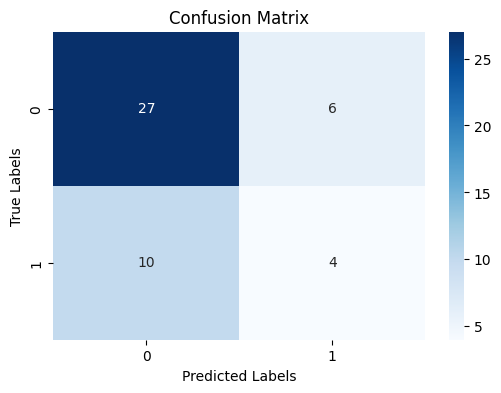

Confusion Matrix:
[[27  6]
 [10  4]]


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

threshold = 0.5
pred = model.predict(text_test)
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [44]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        33
         1.0       0.40      0.29      0.33        14

    accuracy                           0.66        47
   macro avg       0.56      0.55      0.55        47
weighted avg       0.63      0.66      0.64        47



In [45]:
print("--------------------------------------AUDIO (W/o GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Audio()
model = model1.run_model()

model.fit(audio_train,Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min',
    baseline=None, restore_best_weights=True), epochs=25, batch_size = 137)


--------------------------------------AUDIO (W/o GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 4s 558ms/step - loss: 0.6901 - val_loss: 0.6998
Epoch 2/25
2/2 [==============================] - 0s 199ms/step - loss: 0.6893 - val_loss: 0.7005
Epoch 3/25
2/2 [==============================] - 0s 196ms/step - loss: 0.6887 - val_loss: 0.7007
Epoch 4/25
2/2 [==============================] - 0s 201ms/step - loss: 0.6897 - val_loss: 0.7009
Epoch 5/25
2/2 [==============================] - 0s 196ms/step - loss: 0.6892 - val_loss: 0.7011
Epoch 6/25
2/2 [==============================] - 0s 188ms/step - loss: 0.6886 - val_loss: 0.7014
Epoch 7/25
2/2 [==============================] - 0s 199ms/step - loss: 0.6888 - val_loss: 0.7017
Epoch 8/25
2/2 [==============================] - 0s 200ms/step - loss: 0.6866 - val_loss: 0.7022
Epoch 9/25
2/2 [==============================] - 0s 189ms/step - loss: 0.6885 - val_loss: 0.70

2/2 [==============================] - 0s 28ms/step
Y_pred:  (47, 1)


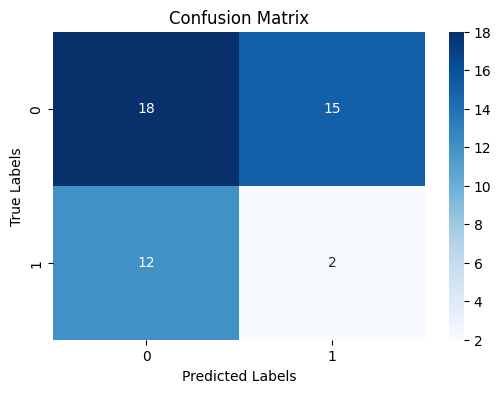

Confusion Matrix:
[[18 15]
 [12  2]]


In [46]:
threshold = 0.5
pred = model.predict(audio_test)
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [47]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.55      0.57        33
         1.0       0.12      0.14      0.13        14

    accuracy                           0.43        47
   macro avg       0.36      0.34      0.35        47
weighted avg       0.46      0.43      0.44        47



In [48]:
print("--------------------------------------VIDEO (W/o GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Video()
model = model1.run_model()

model.fit(video_train,Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min',
    baseline=None, restore_best_weights=True), epochs=25, batch_size = 137)


--------------------------------------VIDEO (W/o GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 5s 686ms/step - loss: 0.6934 - val_loss: 0.6954
Epoch 2/25
2/2 [==============================] - 1s 290ms/step - loss: 0.6933 - val_loss: 0.6998
Epoch 3/25
2/2 [==============================] - 1s 282ms/step - loss: 0.6917 - val_loss: 0.7031
Epoch 4/25
2/2 [==============================] - 1s 286ms/step - loss: 0.6921 - val_loss: 0.7069
Epoch 5/25
2/2 [==============================] - 1s 294ms/step - loss: 0.6923 - val_loss: 0.7094
Epoch 6/25
2/2 [==============================] - 1s 285ms/step - loss: 0.6921 - val_loss: 0.7095
Epoch 7/25
2/2 [==============================] - 1s 283ms/step - loss: 0.6922 - val_loss: 0.7089
Epoch 8/25
2/2 [==============================] - 1s 280ms/step - loss: 0.6923 - val_loss: 0.7084
Epoch 9/25
2/2 [==============================] - 1s 291ms/step - loss: 0.6916 - val_loss: 0.70

2/2 [==============================] - 0s 35ms/step
Y_pred:  (47, 1)


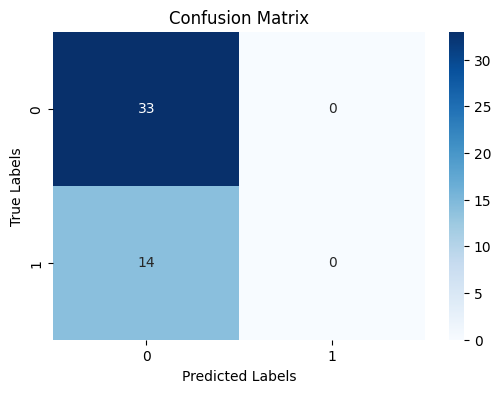

Confusion Matrix:
[[33  0]
 [14  0]]


In [49]:
threshold = 0.5
pred = model.predict(video_test)
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [51]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        33
         1.0       0.00      0.00      0.00        14

    accuracy                           0.70        47
   macro avg       0.35      0.50      0.41        47
weighted avg       0.49      0.70      0.58        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print("--------------------------------------AUDIO + TEXT (W/o GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Text_Audio()
model = model1.run_model()

model.fit([audio_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
    baseline=None, restore_best_weights=True),epochs=25, batch_size = 137)


--------------------------------------AUDIO + TEXT (W/o GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 9s 2s/step - loss: 0.6936 - val_loss: 0.6911
Epoch 2/25
2/2 [==============================] - 3s 1s/step - loss: 0.6909 - val_loss: 0.6906
Epoch 3/25
2/2 [==============================] - 3s 901ms/step - loss: 0.6883 - val_loss: 0.6937
Epoch 4/25
2/2 [==============================] - 2s 873ms/step - loss: 0.6861 - val_loss: 0.6974
Epoch 5/25
2/2 [==============================] - 2s 879ms/step - loss: 0.6836 - val_loss: 0.6972
Epoch 6/25
2/2 [==============================] - 2s 887ms/step - loss: 0.6809 - val_loss: 0.6951
Epoch 7/25
2/2 [==============================] - 2s 887ms/step - loss: 0.6776 - val_loss: 0.6955
Epoch 8/25
2/2 [==============================] - 3s 925ms/step - loss: 0.6739 - val_loss: 0.6950
Epoch 9/25
2/2 [==============================] - 2s 888ms/step - loss: 0.6697 - val_loss: 0.6

2/2 [==============================] - 1s 117ms/step
Y_pred:  (47, 1)


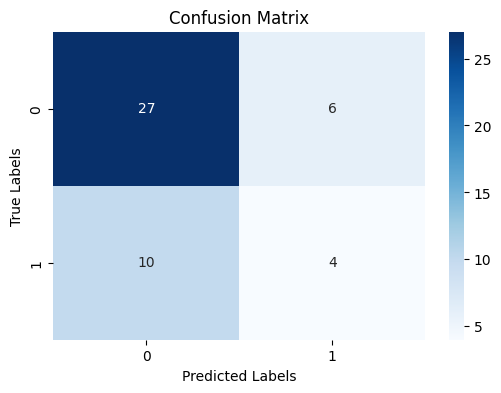

Confusion Matrix:
[[27  6]
 [10  4]]


In [53]:
threshold = 0.5
pred = model.predict([audio_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [54]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        33
         1.0       0.40      0.29      0.33        14

    accuracy                           0.66        47
   macro avg       0.56      0.55      0.55        47
weighted avg       0.63      0.66      0.64        47



In [55]:
print("--------------------------------------VIDEO + TEXT (W/O GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Text_Video()
model = model1.run_model()

model.fit([video_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
    baseline=None, restore_best_weights=True),epochs=25, batch_size = 137)


--------------------------------------VIDEO + TEXT (W/O GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 8s 2s/step - loss: 0.6935 - val_loss: 0.6932
Epoch 2/25
2/2 [==============================] - 3s 935ms/step - loss: 0.6902 - val_loss: 0.6963
Epoch 3/25
2/2 [==============================] - 3s 917ms/step - loss: 0.6867 - val_loss: 0.6983
Epoch 4/25
2/2 [==============================] - 3s 929ms/step - loss: 0.6841 - val_loss: 0.6988
Epoch 5/25
2/2 [==============================] - 3s 1s/step - loss: 0.6808 - val_loss: 0.6958
Epoch 6/25
2/2 [==============================] - 3s 917ms/step - loss: 0.6770 - val_loss: 0.6901
Epoch 7/25
2/2 [==============================] - 3s 934ms/step - loss: 0.6721 - val_loss: 0.6817
Epoch 8/25
2/2 [==============================] - 3s 951ms/step - loss: 0.6676 - val_loss: 0.6710
Epoch 9/25
2/2 [==============================] - 3s 948ms/step - loss: 0.6615 - val_loss: 0.6

2/2 [==============================] - 1s 120ms/step
Y_pred:  (47, 1)


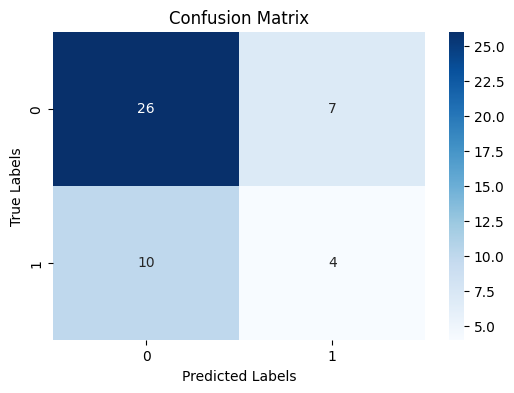

Confusion Matrix:
[[26  7]
 [10  4]]


In [56]:
threshold = 0.5
pred = model.predict([video_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [57]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75        33
         1.0       0.36      0.29      0.32        14

    accuracy                           0.64        47
   macro avg       0.54      0.54      0.54        47
weighted avg       0.62      0.64      0.62        47



In [58]:
print("--------------------------------------AUDIO + TEXT + VIDEO (W/O GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Text_Audio_Video()
model = model1.run_model()

model.fit([audio_train,video_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
    baseline=None, restore_best_weights=True),epochs=25, batch_size = 137)


--------------------------------------AUDIO + TEXT + VIDEO (W/O GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/25
2/2 [==============================] - 10s 2s/step - loss: 0.6932 - val_loss: 0.6911
Epoch 2/25
2/2 [==============================] - 3s 1s/step - loss: 0.6906 - val_loss: 0.6874
Epoch 3/25
2/2 [==============================] - 3s 1s/step - loss: 0.6882 - val_loss: 0.6826
Epoch 4/25
2/2 [==============================] - 3s 1s/step - loss: 0.6858 - val_loss: 0.6775
Epoch 5/25
2/2 [==============================] - 3s 1s/step - loss: 0.6832 - val_loss: 0.6725
Epoch 6/25
2/2 [==============================] - 3s 1s/step - loss: 0.6801 - val_loss: 0.6677
Epoch 7/25
2/2 [==============================] - 3s 1s/step - loss: 0.6760 - val_loss: 0.6634
Epoch 8/25
2/2 [==============================] - 3s 1s/step - loss: 0.6713 - val_loss: 0.6599
Epoch 9/25
2/2 [==============================] - 3s 1s/step - loss: 0.6654 - val_loss: 0.6568
Epoch 10

2/2 [==============================] - 1s 142ms/step
Y_pred:  (47, 1)


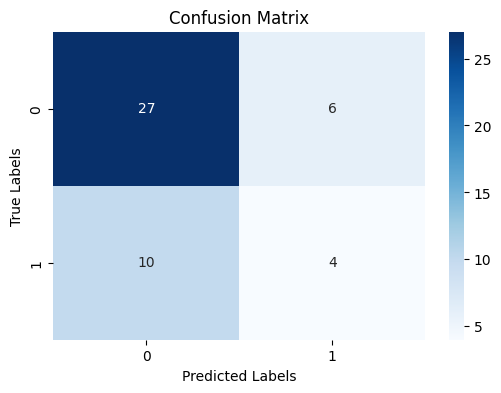

Confusion Matrix:
[[27  6]
 [10  4]]


In [59]:
threshold = 0.5
pred = model.predict([audio_test,video_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [60]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        33
         1.0       0.40      0.29      0.33        14

    accuracy                           0.66        47
   macro avg       0.56      0.55      0.55        47
weighted avg       0.63      0.66      0.64        47

